DATA CREATION

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range(start="2022-01-01", end="2023-12-31", freq="D")
n = len(dates)

trend = np.linspace(100, 500, n)  # upward trend
seasonality = 50 * np.sin(2 * np.pi * dates.dayofyear / 365.25)  # yearly seasonality
noise = np.random.normal(0, 20, n)

traffic = trend + seasonality + noise

df = pd.DataFrame({
    'Date': dates,
    'Visits': np.round(traffic).astype(int)
})
df.to_csv("web_traffic.csv", index=False)


## Tasks:
1. Decompose the time series into Trend, Seasonality, and Residuals.

2. Visualize each component clearly.

3. Identify:

    - When is traffic highest (seasonally)?

    - Is the overall trend increasing or stagnating?

    - Do residuals show anomalies (spikes outside normal patterns)?

4. Suggest 1–2 business actions based on this analysis.

In [2]:
df.head()

,Date,Visits
0,2022-01-01,111
1,2022-01-02,100
2,2022-01-03,117
3,2022-01-04,136
4,2022-01-05,102


In [3]:
df['date']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

df


,Date,Visits,date,month,year
0,2022-01-01,111,1,1,2022
1,2022-01-02,100,2,1,2022
2,2022-01-03,117,3,1,2022
3,2022-01-04,136,4,1,2022
4,2022-01-05,102,5,1,2022
...,...,...,...,...,...
725,2023-12-27,490,27,12,2023
726,2023-12-28,496,28,12,2023
727,2023-12-29,504,29,12,2023
728,2023-12-30,488,30,12,2023


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

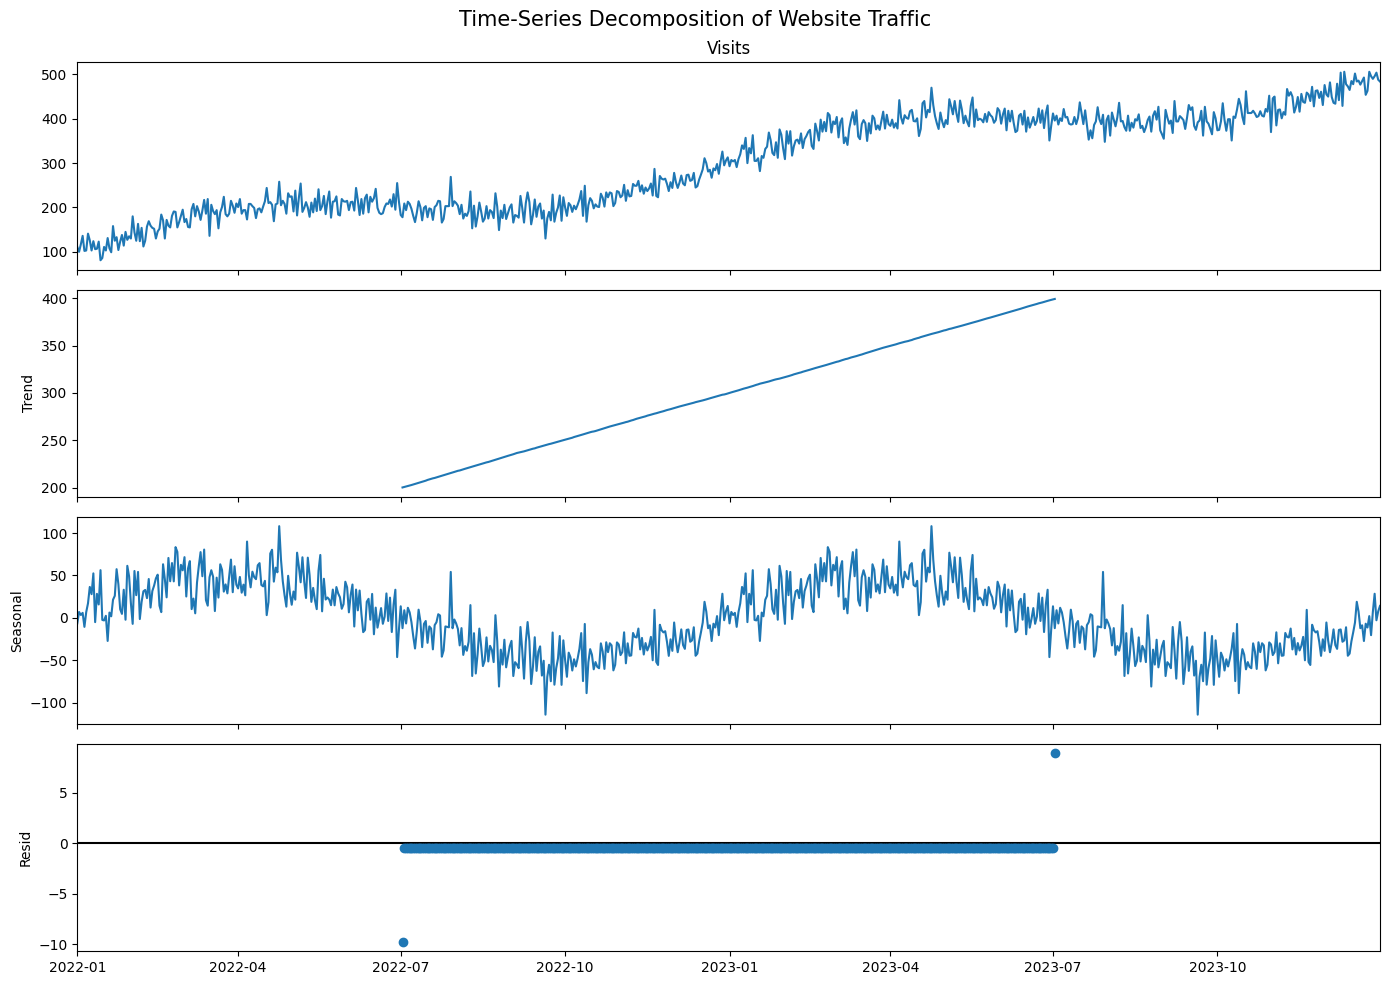

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

result = seasonal_decompose(df['Visits'], model='additive', period=365)

plt.rcParams['figure.figsize'] = (14, 10)  # Width, Height in inches

result.plot()
plt.suptitle("Time-Series Decomposition of Website Traffic", fontsize=15)
plt.tight_layout()
plt.show()


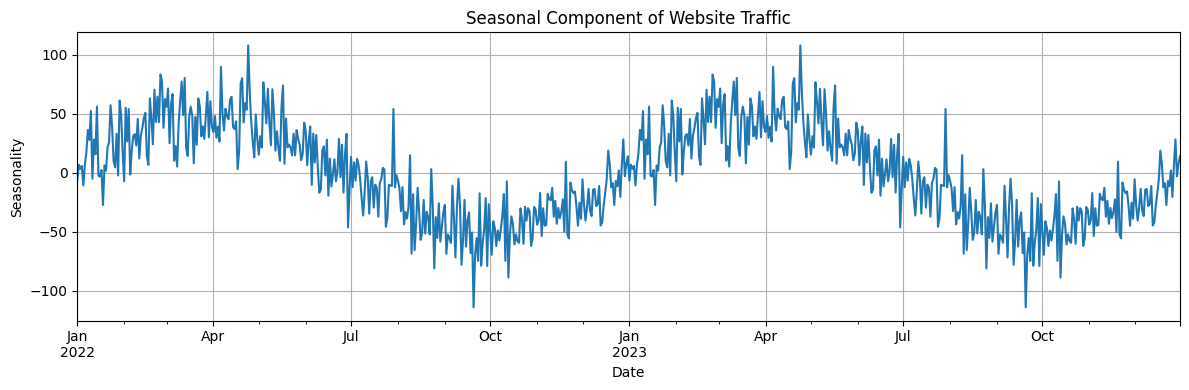

In [26]:
result.seasonal.plot(figsize=(12, 4), title="Seasonal Component of Website Traffic")
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.grid(True)
plt.tight_layout()
plt.show()